In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import seaborn as sns
import pandas as pd
import random
import statistics
import gzip
from collections import Counter
import scipy
import scipy.stats

In [2]:
b2AR_df = pd.read_csv('b2AR_all_data_annot.csv.gz', compression = 'gzip', index_col=0, low_memory=False)


b2AR_df_filt = b2AR_df.loc[(b2AR_df['surfexp_min_cells'] >50) & \
                            #(b2AR_df['Nb80_isoP1_norm_Gal4_reads'] > 2e-05) & \
                            (b2AR_df['Nb80_10uM_norm_Gal4_norm_reads'] > 2e-05)].copy()
b2AR_df_filt_missense = b2AR_df_filt.loc[(b2AR_df_filt['stop'] == False) & \
(b2AR_df_filt['syn_WT'] == False) & \
(b2AR_df_filt['del'] == False)].copy()

print (len(b2AR_df_filt))

7680


In [3]:
import statsmodels.api as sm # to build a LOWESS model
import statsmodels.nonparametric.smoothers_lowess
lowess = sm.nonparametric.lowess

In [4]:
b2AR_df_filt_QC = b2AR_df_filt.loc[(b2AR_df_filt['r2'] > 0.9) &\
(b2AR_df_filt['Emax_QC'] == True) & \
(b2AR_df_filt['EC50_QC'] == True) & \
(b2AR_df_filt['slope'] < 2)].copy()
print (len(b2AR_df_filt_QC))

b2AR_df_filt_missense_QC = b2AR_df_filt_missense.loc[(b2AR_df_filt_missense['r2'] > 0.9) &\
(b2AR_df_filt_missense['Emax_QC'] == True) & \
(b2AR_df_filt_missense['EC50_QC'] == True) & \
(b2AR_df_filt_missense['slope'] < 2)].copy()
print (len(b2AR_df_filt_missense_QC))

5588
5094


In [5]:
ser_dil_concs = []
ser_dil_concs.append(0.00001)
ser_dil_concs.append(0.00001/3.5)
ser_dil_concs.append(0.00001/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)

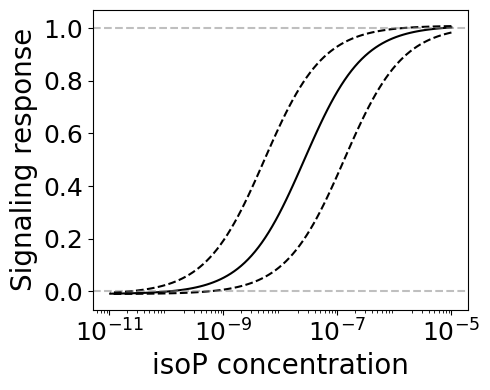

In [6]:
plt.figure(figsize=(5, 4))
x_points = ser_dil_concs[::-1]
sel_df = b2AR_df_filt_QC.loc['WT']
y_points = list(sel_df[['Nb80_10pM_WT_normed_score', 'Nb80_36pM_WT_normed_score', \
    'Nb80_126pM_WT_normed_score', 'Nb80_444pM_WT_normed_score', 'Nb80_1.5nM_WT_normed_score', \
    'Nb80_5.4nM_WT_normed_score', 'Nb80_19nM_WT_normed_score', 'Nb80_66nM_WT_normed_score', \
    'Nb80_233nM_WT_normed_score', 'Nb80_816nM_WT_normed_score', 'Nb80_2.8uM_WT_normed_score', \
    'Nb80_10uM_WT_normed_score']])
x_fit = np.geomspace(x_points[-1], x_points[0],100)
y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
#plt.plot(x_points, y_points, 'ko')
y_fit2 = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / ((sel_df.EC50/5)**sel_df.slope + i**sel_df.slope) for i in x_fit]
y_fit3 = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / ((sel_df.EC50*5)**sel_df.slope + i**sel_df.slope) for i in x_fit]

plt.plot(x_fit , y_fit, color='k')
plt.plot(x_fit , y_fit2, color='k', linestyle='dashed')
plt.plot(x_fit , y_fit3, color='k', linestyle='dashed')

plt.axhline(y=0, linestyle='dashed', color='grey', alpha=0.5)
plt.axhline(y=1, linestyle='dashed', color='grey', alpha=0.5)
plt.xscale('log')

plt.xticks([1e-11,1e-9, 1e-7, 1e-5], fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Signaling response', fontsize=20)
plt.xlabel('isoP concentration', fontsize=20)
plt.ylim(-0.07, 1.07)
plt.tight_layout()
#plt.savefig('change_potency_cartoon.png', dpi=250)

In [7]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['firebrick','white','firebrick'])


<Axes: >

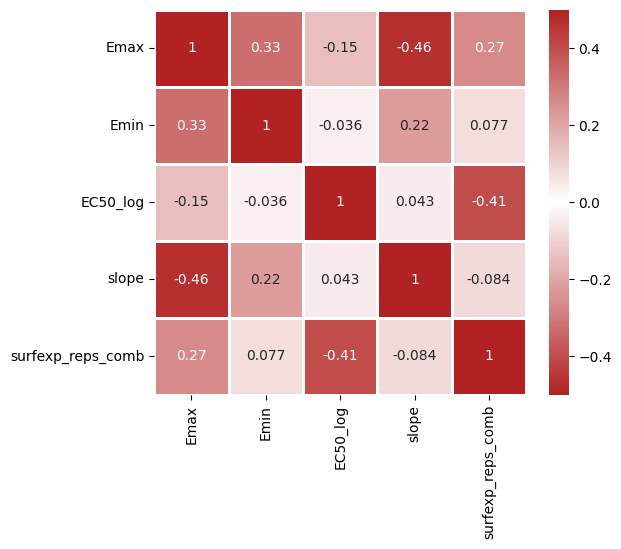

In [8]:
plt.figure(figsize=(6, 5))
sns.heatmap((b2AR_df_filt_missense_QC[['Emax', 'Emin', 'EC50_log', 'slope', 'surfexp_reps_comb']].corr(method='spearman')), annot=True, \
           linewidth=1, edgecolor='white', cmap=cmap, center=0, vmin=-0.5, vmax=0.5)
#plt.savefig('pharma_props_corr_surfexp_firebrick.png', dpi=200)


PearsonRResult(statistic=np.float64(0.7369002916984309), pvalue=np.float64(1.6496376493932393e-55))
317


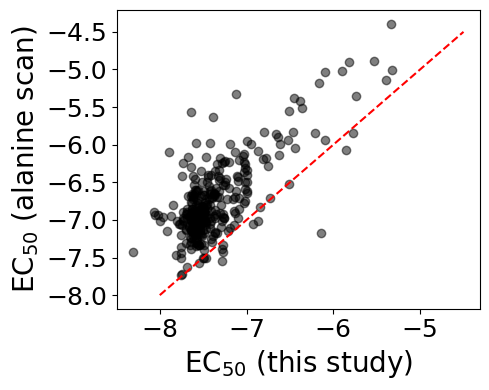

In [9]:
plt.figure(figsize=(5, 4))
curate_df = b2AR_df_filt_missense_QC.loc[b2AR_df_filt_missense_QC['Heydenreich_curation'] == 1]
plt.plot(curate_df['EC50_log'], curate_df['Heydenreich_EC50'], 'ko', alpha=0.5)
plt.xlabel('$\mathdefault{EC_{50}}$ (this study)', fontsize=20)
plt.ylabel('$\mathdefault{EC_{50}}$ (alanine scan)', fontsize=20)
plt.xticks([-8, -7, -6, -5], fontsize=18)
plt.yticks(fontsize=18)

plt.plot([-8, -4.5], [-8, -4.5], linestyle='dashed', color='red')
#plt.savefig('EC50_multi_versus_serial.png', dpi=250)
sel_df = curate_df[['EC50_log', 'Heydenreich_EC50']].dropna()
print (scipy.stats.pearsonr(sel_df['EC50_log'], sel_df['Heydenreich_EC50']))
print (len(sel_df))
plt.tight_layout()
#plt.savefig('ala_scan_vs_DMS_EC50.png', dpi=250)

In [10]:
x = b2AR_df_filt_missense_QC['surfexp_reps_comb']
y = b2AR_df_filt_missense_QC['EC50_log']

surfexp_EC50_lowess = lowess(y, x, frac=0.5, it=3, delta=0.0, xvals=x, is_sorted=False, missing='drop', return_sorted=True)
b2AR_df_filt_missense_QC['surfexp_EC50_lowess'] = surfexp_EC50_lowess
b2AR_df_filt_missense_QC['surfexp_EC50_residual'] = b2AR_df_filt_missense_QC['EC50_log'] - b2AR_df_filt_missense_QC['surfexp_EC50_lowess']


SignificanceResult(statistic=np.float64(-0.4054047382827516), pvalue=np.float64(8.89978444834553e-201))


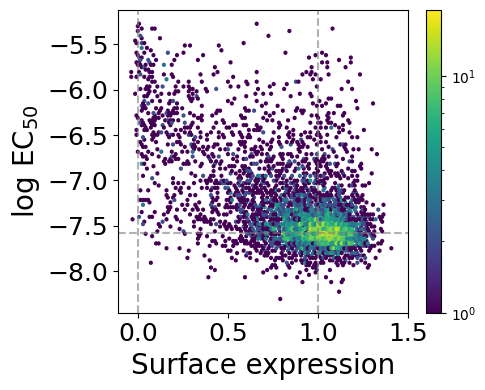

In [11]:
plt.figure(figsize=(5, 4))

plt.hexbin(b2AR_df_filt_missense_QC['surfexp_reps_comb'], b2AR_df_filt_missense_QC['EC50_log'], bins='log', alpha=1)

plt.xlabel('Surface expression', fontsize=20)
plt.ylabel('log $\mathdefault{EC_{50}}$', fontsize=20)
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=b2AR_df_filt_missense_QC.loc['WT']['EC50_log'], color='grey', linestyle='dashed', alpha=0.6)
#plt.ylim(-9, -4)

#plt.plot(b2AR_dose_response_df_filt_QC.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
#         b2AR_dose_response_df_filt_QC.sort_values('surfexp_reps_comb')['surfexp_EC50_lowess'],color='k')

print (scipy.stats.spearmanr(b2AR_df_filt_missense_QC['surfexp_reps_comb'][1:], b2AR_df_filt_missense_QC['EC50_log'][1:]))

plt.xticks([0, 0.5, 1, 1.5],fontsize=18)
plt.yticks(fontsize=18)
plt.colorbar()
plt.tight_layout()
#plt.savefig('Surfexp_logEC50_hexbin.png', dpi=250)

In [12]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['saddlebrown','white','mediumaquamarine'])


SignificanceResult(statistic=np.float64(-0.4054047382827516), pvalue=np.float64(8.89978444834553e-201))


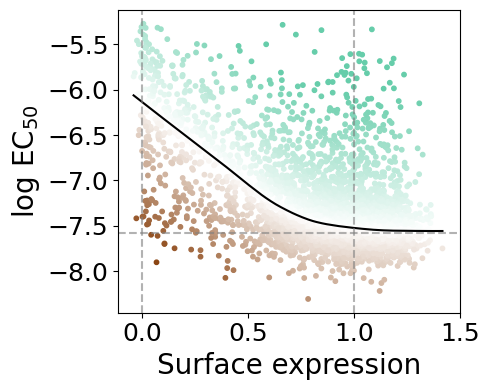

In [13]:
plt.figure(figsize=(5, 4))

#plt.hexbin(b2AR_dose_response_df_filt_QC['surfexp_reps_comb'], b2AR_dose_response_df_filt_QC['EC50_log'], bins='log', alpha=0.6)
plt.scatter(x = b2AR_df_filt_missense_QC['surfexp_reps_comb'], y = b2AR_df_filt_missense_QC['EC50_log'], \
           c = b2AR_df_filt_missense_QC['surfexp_EC50_residual'], s=10,  cmap=cmap, vmin=-1.5, vmax=1.5)

plt.xlabel('Surface expression', fontsize=20)
plt.ylabel('log $\mathdefault{EC_{50}}$', fontsize=20)

#plt.ylim(-9, -4)

plt.plot(b2AR_df_filt_missense_QC.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
         b2AR_df_filt_missense_QC.sort_values('surfexp_reps_comb')['surfexp_EC50_lowess'],color='k')
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=b2AR_df_filt_missense_QC.loc['WT']['EC50_log'], color='grey', linestyle='dashed', alpha=0.6)

print (scipy.stats.spearmanr(b2AR_df_filt_missense_QC['surfexp_reps_comb'][1:], b2AR_df_filt_missense_QC['EC50_log'][1:]))

plt.xticks([0, 0.5, 1, 1.5],fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.savefig('EC50-surfexp_lowess.png', dpi=250)

SignificanceResult(statistic=np.float64(-0.4054047382827516), pvalue=np.float64(8.89978444834553e-201))


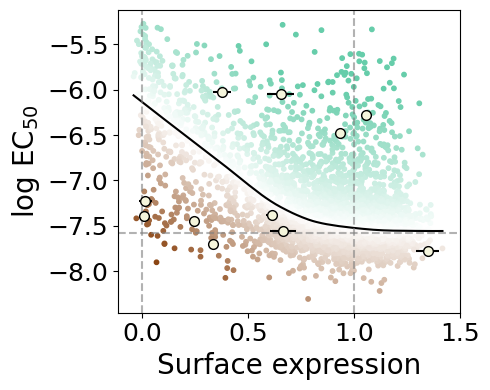

In [14]:
plt.figure(figsize=(5, 4))

#plt.hexbin(b2AR_dose_response_df_filt_QC['surfexp_reps_comb'], b2AR_dose_response_df_filt_QC['EC50_log'], bins='log', alpha=0.6)
plt.scatter(x = b2AR_df_filt_missense_QC['surfexp_reps_comb'], y = b2AR_df_filt_missense_QC['EC50_log'], \
           c = b2AR_df_filt_missense_QC['surfexp_EC50_residual'], s=10,  cmap=cmap, vmin=-1.5, vmax=1.5)

plt.xlabel('Surface expression', fontsize=20)
plt.ylabel('log $\mathdefault{EC_{50}}$', fontsize=20)

#plt.ylim(-9, -4)

plt.plot(b2AR_df_filt_missense_QC.sort_values('surfexp_reps_comb')['surfexp_reps_comb'], \
         b2AR_df_filt_missense_QC.sort_values('surfexp_reps_comb')['surfexp_EC50_lowess'],color='k')

print (scipy.stats.spearmanr(b2AR_df_filt_missense_QC['surfexp_reps_comb'][1:], b2AR_df_filt_missense_QC['EC50_log'][1:]))

#sel_df = b2AR_df_filt_missense_QC.loc[b2AR_df_filt_missense_QC['pos'] == 328]
#sel_df = b2AR_df_filt_missense_QC.loc[b2AR_df_filt_missense_QC['pos'] == 268]
sel_df = b2AR_df_filt_missense_QC.loc[b2AR_df_filt_missense_QC['pos'] == 282]


plt.errorbar(sel_df['surfexp_reps_comb'], sel_df['EC50_log'], \
             marker='o', color='k', markerfacecolor='beige', linestyle='None', markersize=7, \
            yerr=None, xerr=sel_df['surfexp_reps_comb_SEM'])

#surfexp_vals = list(sel_df['surfexp_reps_comb'])
#EC50_vals = list(sel_df['EC50_log'])
#label = [i[-1] for i in list(sel_df.index)]

#for index_pos in range(0, len(surfexp_vals)):
#    plt.annotate(label[index_pos], (surfexp_vals[index_pos]+0.01, EC50_vals[index_pos]+0.01), fontsize=12, fontweight='bold', color='k')
plt.axvline(x=0, color='grey', linestyle='dashed', alpha=0.6)
plt.axvline(x=1, color='grey', linestyle='dashed', alpha=0.6)
plt.axhline(y=b2AR_df_filt_missense_QC.loc['WT']['EC50_log'], color='grey', linestyle='dashed', alpha=0.6)




plt.xticks([0, 0.5, 1, 1.5],fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
#plt.savefig('EC50-surfexp_lowess_highlight_282.png', dpi=250)

In [15]:
ICL3_residues = set(b2AR_df.loc[b2AR_df['topo'] == 'ICL3'].pos)
ECL2_residues = set(b2AR_df.loc[b2AR_df['topo'] == 'ECL2'].pos)


In [16]:
pos_list = []
num_considered = []
pvals = []
average_resid = []
IQR_list = []

for pos in range(2, 414):
    b2AR_df_filt_missense_QC['surfexp_EC50_residual']
    test_df = b2AR_df_filt_missense_QC.loc[b2AR_df_filt_missense_QC['pos'] == pos]
    compare_df = b2AR_df_filt_missense_QC.loc[b2AR_df_filt_missense_QC['pos'] != pos]
    if len(test_df) > 0:
        pvals.append(scipy.stats.mannwhitneyu(test_df['surfexp_EC50_residual'], compare_df['surfexp_EC50_residual'], alternative='two-sided', method='asymptotic')[1])
        pos_list.append(pos)
        num_considered.append(len(test_df))
        average_resid.append(np.average(test_df['surfexp_EC50_residual']))
        IQR_list.append(abs (np.percentile(test_df['surfexp_EC50_residual'], 75) - np.percentile(test_df['surfexp_EC50_residual'], 25)))

    else:
        pvals.append(np.nan)
        pos_list.append(pos)
        num_considered.append(0)
        average_resid.append(np.nan)
        IQR_list.append(np.nan)
comp_df = pd.DataFrame(index=pos_list)
comp_df['num_considered_surfexp_EC50'] = num_considered
comp_df['average_residual_surfexp_EC50'] = average_resid
comp_df['pval_surfexp_EC50'] = pvals
comp_df['EC50_IQR'] = IQR_list
comp_df_filt = comp_df.dropna().copy()
results = statsmodels.stats.multitest.multipletests(comp_df_filt['pval_surfexp_EC50'], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
comp_df_filt['pval_surfexp_EC50_FDR_bool'] = results[0]
comp_df_filt['pval_surfexp_EC50_FDR_val'] = results[1]

In [17]:
EC50_LoF = comp_df_filt.loc[(comp_df_filt['pval_surfexp_EC50_FDR_bool'] == True) & (comp_df_filt['average_residual_surfexp_EC50'] > 0)].index
EC50_GoF = comp_df_filt.loc[(comp_df_filt['pval_surfexp_EC50_FDR_bool'] == True) & (comp_df_filt['average_residual_surfexp_EC50'] < 0)].index


In [18]:
from scipy.stats import fisher_exact


In [19]:
non_GoF = [i for i in range(2, 414) if i not in EC50_GoF]


GoF_ICL3 = len([i for i in EC50_GoF if i in ICL3_residues])
GoF_non_ICL3 = len([i for i in EC50_GoF if i not in ICL3_residues])

non_GoF_ICL3 = len([i for i in non_GoF if i in ICL3_residues])
non_GoF_non_ICL3 = len([i for i in non_GoF if i not in ICL3_residues])

print (GoF_ICL3 + GoF_non_ICL3 + non_GoF_ICL3 + non_GoF_non_ICL3)

#test for enrichment of CoF in second shell

table = np.array([[GoF_ICL3, non_GoF_ICL3], [GoF_non_ICL3, non_GoF_non_ICL3]])
res = fisher_exact(table, alternative='greater')

res

412


SignificanceResult(statistic=np.float64(3.38), pvalue=np.float64(0.00727275437222107))

In [20]:
comp_df_filt['minlog10pval_EC50'] = -np.log10(comp_df_filt['pval_surfexp_EC50_FDR_val'])


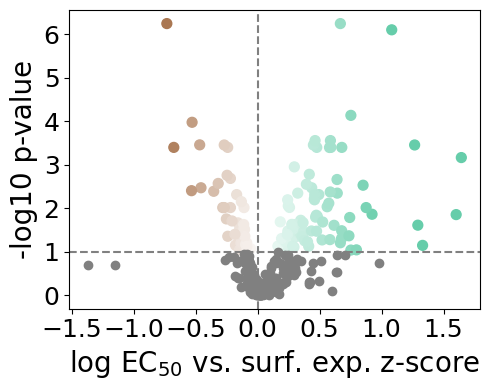

In [21]:
plt.figure(figsize=(5,4))
below_thresh = comp_df_filt.loc[comp_df_filt['minlog10pval_EC50'] < 1]
above_thresh = comp_df_filt.loc[(comp_df_filt['minlog10pval_EC50'] >= 1)]
above_thresh_neg = comp_df_filt.loc[(comp_df_filt['minlog10pval_EC50'] >= 1) & (comp_df_filt['average_residual_surfexp_EC50'] > 0)]
above_thresh_pos = comp_df_filt.loc[(comp_df_filt['minlog10pval_EC50'] >= 1) & (comp_df_filt['average_residual_surfexp_EC50'] < 0)]

plt.plot(below_thresh['average_residual_surfexp_EC50'], below_thresh['minlog10pval_EC50'], color='gray', marker='o', linestyle='None')


plt.scatter(x = above_thresh['average_residual_surfexp_EC50'], y = above_thresh['minlog10pval_EC50'], \
           c = above_thresh['average_residual_surfexp_EC50'], s=50,  cmap=cmap, vmin=-1, vmax=1)


plt.axvline(x = 0, color='grey', linestyle='dashed')
plt.axhline(y = 1, color='grey', linestyle='dashed')

plt.ylabel('-log10 p-value', fontsize=20)
plt.xlabel('log $\mathdefault{EC_{50}}$ vs. surf. exp. z-score', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.tight_layout()
#plt.savefig('surfexp_EC50_volcano.png', dpi=250)

0.44571709865893205


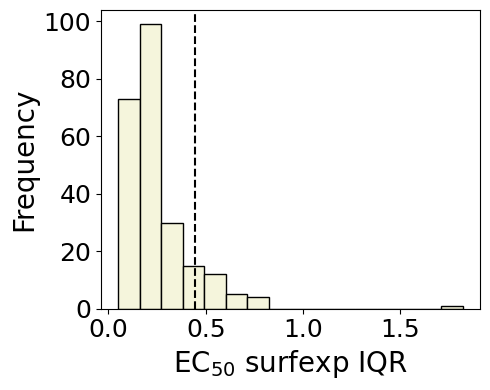

In [22]:
IQR_df = comp_df_filt.loc[(comp_df_filt['pval_surfexp_EC50_FDR_bool'] == False) & (comp_df_filt['num_considered_surfexp_EC50']>=10)]

plt.figure(figsize=(5, 4))
plt.hist(IQR_df['EC50_IQR'], \
         bins=16, edgecolor='k', color='beige')

plt.axvline(x = np.percentile(IQR_df['EC50_IQR'], 90), \
                             linestyle='dashed', color='k')
plt.yticks(fontsize=18)
plt.xticks([0, 0.5, 1, 1.5], fontsize=18)
plt.ylabel('Frequency', fontsize=20)

plt.xlabel('$\mathdefault{EC_{50}}$ surfexp IQR', fontsize=20)
plt.tight_layout()
#plt.savefig('EC50_surfexp_IQR.png', dpi=250)
print (np.percentile(IQR_df['EC50_IQR'], 90))

In [23]:
EC50_CoF = IQR_df.loc[IQR_df['EC50_IQR'] > 0.44571709865893205].index


In [80]:
IQR_df.loc[IQR_df['EC50_IQR'] > 0.44571709865893205]

,num_considered_surfexp_EC50,average_residual_surfexp_EC50,pval_surfexp_EC50,EC50_IQR,pval_surfexp_EC50_FDR_bool,pval_surfexp_EC50_FDR_val,minlog10pval_EC50
17,11,-0.268284,0.057176,0.624291,False,0.158677,0.799486
35,13,0.007746,0.483577,0.541758,False,0.661732,0.179318
37,10,-0.135563,0.473470,0.617282,False,0.652468,0.185441
68,16,0.173731,0.913972,0.767551,False,0.949215,0.022635
89,15,0.086012,0.896061,0.503025,False,0.942731,0.025612
115,13,0.314769,0.060963,0.774856,False,0.164724,0.783242
120,11,0.302804,0.107285,0.733429,False,0.239464,0.620760
123,11,-0.232817,0.044223,0.669466,False,0.133330,0.875072
132,11,-0.050201,0.612195,0.805860,False,0.752075,0.123739
133,12,0.274473,0.012816,0.475411,False,0.055080,1.259003


In [24]:
interactions_dict_3SN6 = {}
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/3SN6_R.tsv') as data:
    print (data.readline())
    print (data.readline())
    for line in data:
        ls = line.split()
        if ls[1] not in interactions_dict_3SN6:
            interactions_dict_3SN6[ls[1]] = []
        res1 = int(ls[2].split(':')[2])
        res2 = int(ls[3].split(':')[2])
        if res1 != res2 and int(res1) < 450 and int(res2) < 450:
            interactions_dict_3SN6[ls[1]].append([res1, res2])

# total_frames:1 beg:0 end:0 stride:1 interaction_types:hp,sb,pc,ps,ts,vdw,hb

# Columns: frame, interaction_type, atom_1, atom_2[, atom_3[, atom_4]]



In [25]:
interactions_dict_2RH1 = {}
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/2RH1_A.tsv') as data:
    print (data.readline())
    print (data.readline())
    for line in data:
        ls = line.split()
        if ls[1] not in interactions_dict_2RH1:
            interactions_dict_2RH1[ls[1]] = []
        res1 = int(ls[2].split(':')[2])
        res2 = int(ls[3].split(':')[2])
        if res1 != res2 and int(res1) < 450 and int(res2) < 450:
            interactions_dict_2RH1[ls[1]].append([res1, res2])

# total_frames:1 beg:0 end:0 stride:1 interaction_types:hp,sb,pc,ps,ts,vdw,hb

# Columns: frame, interaction_type, atom_1, atom_2[, atom_3[, atom_4]]



In [26]:
all_3SN6_hits_dict = {}
for var in EC50_GoF:
    all_3SN6_hits_dict[var] = {}
    for interaction_type in interactions_dict_3SN6:
        all_3SN6_hits_dict[var][interaction_type] = []
        for interaction in interactions_dict_3SN6[interaction_type]:
            if var in interaction:
                all_3SN6_hits_dict[var][interaction_type].append([i for i in interaction if i != var ][0])

In [27]:
all_2RH1_hits_dict = {}
for var in EC50_GoF:
    all_2RH1_hits_dict[var] = {}
    for interaction_type in interactions_dict_2RH1:
        all_2RH1_hits_dict[var][interaction_type] = []
        for interaction in interactions_dict_2RH1[interaction_type]:
            if var in interaction:
                all_2RH1_hits_dict[var][interaction_type].append([i for i in interaction if i != var ][0])

In [43]:
overlap_LoF_hits = [76, 78, 79, 82, 88, 106, 113, 114, 117, 118, 119, 121, 127, 128, 129, 131, 135, 136, 138, 139, 141, 165, 190, 191, 193, 199, 203, 204, 207, 208, 209, 219, 286, 289, 290, 293, 294, 312, 315, 318, 322, 325, 326, 327, 328, 329, 330]

print (len(overlap_LoF_hits))

47


In [36]:
LoF_core_network = [76, 78, 79, 82, 113, 114, 117, 118, \
                    119, 121, 127, 128, 129, 131, 135, 136, \
                    165, 199, 203, 204, \
                    207, 208, 209, 219, 286, 289, 290, 293, 294, \
                    312, 315, 318, 322, 325, 326, 327, 328, 329, 330]

In [52]:
core_LoF_atoms_poss = []
b2AR_poss_present = set()
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/3sn6.pdb') as data:
    for line in data:
        ls = line.split()
        if len(ls) > 4:
            if ls[0] == 'ATOM' and ls[4] == 'R' and int(ls[5]) in LoF_core_network:
                core_LoF_atoms_poss.append([float(i) for i in ls[6:9]])
        if len(ls) > 4:
            if ls[0] == 'ATOM' and ls[4] == 'R':
                b2AR_poss_present.add(ls[5])

In [53]:
core_min_LoF_dist_dict = {}
for pos in b2AR_poss_present:
    distances = []
    with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/3sn6.pdb') as data:
        for line in data:
            ls = line.split()
            if len(ls) > 4: 
                if ls[0] == 'ATOM' and ls[4] == 'R':
                    if ls[5] == pos:
                        #print ('yes')
                        for atom in range(0, len(core_LoF_atoms_poss)):
                            dist1 = (float(ls[6]) - core_LoF_atoms_poss[atom][0])**2
                            dist2 = (float(ls[7]) - core_LoF_atoms_poss[atom][1])**2
                            dist3 = (float(ls[8]) - core_LoF_atoms_poss[atom][2])**2
                            distances.append(np.sqrt(dist1+dist2+dist3))
    #print (pos, distances)
    core_min_LoF_dist_dict[int(pos)] = float(min(distances))

In [66]:
core_LoF_atoms_poss = []
b2AR_poss_present = set()
with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/b2AR_active_GPCRdb.pdb') as data:
    for line in data:
        ls = line.split()
        if len(ls) > 4:
            if ls[0] == 'ATOM' and ls[4] == 'A' and int(ls[5]) in LoF_core_network:
                core_LoF_atoms_poss.append([float(i) for i in ls[6:9]])
        if len(ls) > 4:
            if ls[0] == 'ATOM' and ls[4] == 'A':
                b2AR_poss_present.add(ls[5])

In [67]:
core_min_LoF_dist_dict = {}
for pos in b2AR_poss_present:
    distances = []
    with open ('/Users/tmighell/CRG/GPCR_DMS/b2AR_structures/b2AR_active_GPCRdb.pdb') as data:
        for line in data:
            ls = line.split()
            if len(ls) > 4: 
                if ls[0] == 'ATOM' and ls[4] == 'A':
                    if ls[5] == pos:
                        #print ('yes')
                        for atom in range(0, len(core_LoF_atoms_poss)):
                            dist1 = (float(ls[6]) - core_LoF_atoms_poss[atom][0])**2
                            dist2 = (float(ls[7]) - core_LoF_atoms_poss[atom][1])**2
                            dist3 = (float(ls[8]) - core_LoF_atoms_poss[atom][2])**2
                            distances.append(np.sqrt(dist1+dist2+dist3))
    #print (pos, distances)
    core_min_LoF_dist_dict[int(pos)] = float(min(distances))

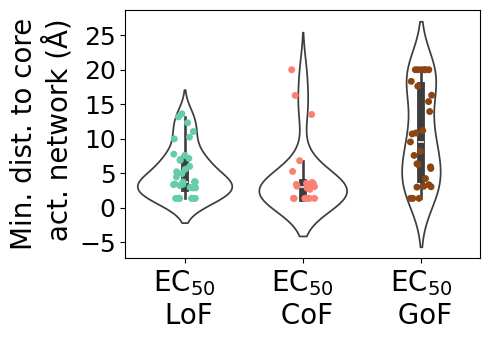

In [74]:
EC50_LoF_dists = np.clip([core_min_LoF_dist_dict[i] for i in EC50_LoF if str(i) in b2AR_poss_present and i not in overlap_LoF_hits], 0, 20)
EC50_GoF_dists = np.clip([core_min_LoF_dist_dict[i] for i in EC50_GoF if str(i) in b2AR_poss_present and i not in overlap_LoF_hits], 0, 20)
EC50_CoF_dists = np.clip([core_min_LoF_dist_dict[i] for i in EC50_CoF if str(i) in b2AR_poss_present and i not in overlap_LoF_hits], 0, 20)

dist_df = pd.DataFrame({'$\mathdefault{EC_{50}}$\n LoF': pd.Series(EC50_LoF_dists), \
                        '$\mathdefault{EC_{50}}$\n CoF': pd.Series(EC50_CoF_dists), \
                       '$\mathdefault{EC_{50}}$\n GoF': pd.Series(EC50_GoF_dists)})

plt.figure(figsize=(5, 3.5))
my_pal = {'$\mathdefault{EC_{50}}$\n LoF': 'mediumaquamarine', \
          '$\mathdefault{EC_{50}}$\n CoF': 'salmon', \
          '$\mathdefault{EC_{50}}$\n GoF': 'saddlebrown'}

sns.violinplot(data = dist_df, color='white')
sns.stripplot(data = dist_df, palette=my_pal)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel('Min. dist. to core\n act. network (Å)', fontsize=20)
plt.tight_layout()
plt.savefig('EC50_distance_to_Emax_Lof_network.png', dpi=250)

In [75]:
print (scipy.stats.mannwhitneyu(EC50_LoF_dists, EC50_CoF_dists))
print (scipy.stats.mannwhitneyu(EC50_CoF_dists, EC50_GoF_dists))
print (scipy.stats.mannwhitneyu(EC50_LoF_dists, EC50_GoF_dists))

MannwhitneyuResult(statistic=np.float64(520.0), pvalue=np.float64(0.10107706856107712))
MannwhitneyuResult(statistic=np.float64(150.0), pvalue=np.float64(0.0007363495635504418))
MannwhitneyuResult(statistic=np.float64(278.0), pvalue=np.float64(0.0013060424147039629))


In [76]:
print (len(EC50_LoF_dists))
print (len(EC50_CoF_dists))
print (len(EC50_GoF_dists))

36
23
29


In [82]:
EC50_CoF_annot = []
for pos in comp_df_filt.index:
    if pos in EC50_CoF:
        EC50_CoF_annot.append(True)
    else:
        EC50_CoF_annot.append(False)
comp_df_filt['EC50_CoF'] = EC50_CoF_annot

In [83]:
comp_df_filt.to_excel('EC50_surfexp_supp_table.xlsx')

In [84]:
comp_df_filt

,num_considered_surfexp_EC50,average_residual_surfexp_EC50,pval_surfexp_EC50,EC50_IQR,pval_surfexp_EC50_FDR_bool,pval_surfexp_EC50_FDR_val,minlog10pval_EC50,EC50_CoF
2,7,-0.077408,0.268112,0.115877,False,0.460925,0.336370,False
3,5,0.063255,0.497289,0.060175,False,0.667656,0.175447,False
4,10,0.065779,0.372483,0.218803,False,0.551761,0.258249,False
5,10,0.070621,0.384956,0.244308,False,0.559432,0.252253,False
6,6,-0.241944,0.009241,0.276108,True,0.044227,1.354313,False
...,...,...,...,...,...,...,...,...
409,19,-0.086678,0.034454,0.165904,False,0.111371,0.953230,False
410,18,-0.017127,0.592507,0.193453,False,0.738775,0.131488,False
411,18,-0.055455,0.141705,0.124669,False,0.293584,0.532268,False
412,18,-0.025603,0.410006,0.190456,False,0.591580,0.227987,False
